# Business Problem

### A cloth manufacturing company is interested to know about the segment or attributes causes high sale

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings 
warnings.filterwarnings('ignore')

## Data Collection And Description

In [3]:
company = pd.read_csv('Company_Data.csv')

In [4]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


## Checking size of dataset

In [5]:
company.shape

(400, 11)

### Checking columns

In [6]:
company.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

# Information of dataset

In [7]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


## Checking for null values

In [8]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

##### No missing data

### Checking for duplicated data in dataset

In [9]:
company[company.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


##### NO duplicated values in the dataset

# Descriptive Statistics

In [10]:
company.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


# Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder =LabelEncoder()
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc']) 
company['Urban']= label_encoder.fit_transform(company['Urban'])
company['US']= label_encoder.fit_transform(company['US'])

In [12]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


#### 1 means Yes,0 means NO

## Checking for Outliers using Boxplot

<Axes: >

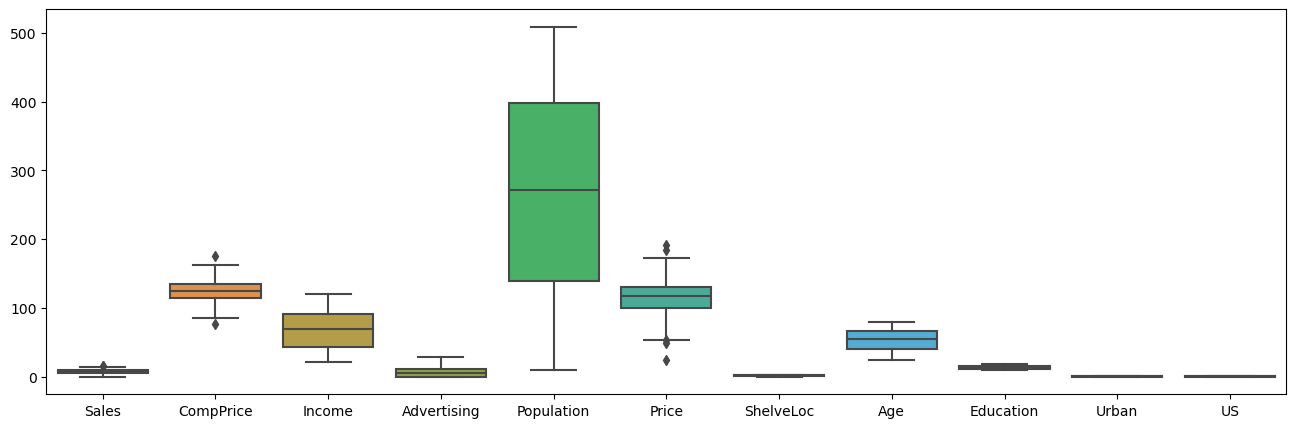

In [13]:
plt.figure(figsize=(16,5))
sns.boxplot(company)

<Axes: >

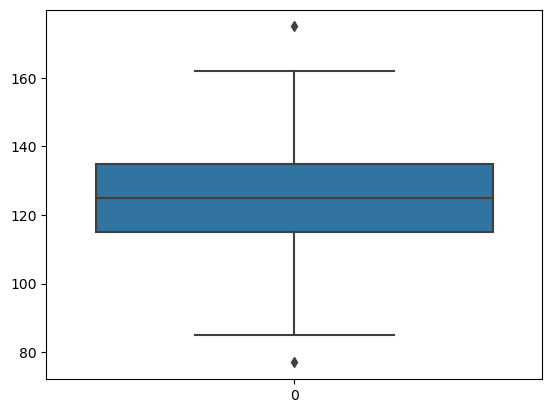

In [14]:
sns.boxplot(company['CompPrice'])

<Axes: >

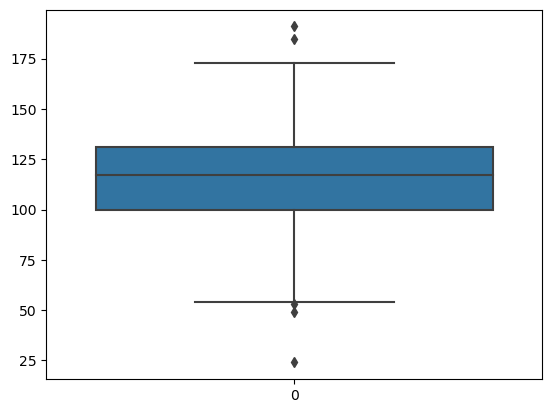

In [15]:
sns.boxplot(company['Price'])

<Axes: >

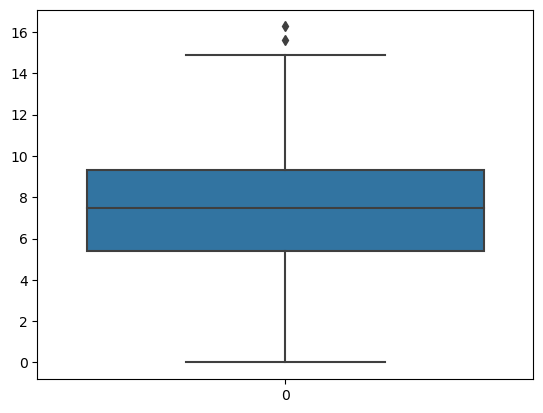

In [16]:
sns.boxplot(company['Sales'])

In [17]:
percentile25 = company['Price'].quantile(0.25)
percentile75 = company['Price'].quantile(0.75)
percentile_25 = company['Sales'].quantile(0.25)
percentile_75 = company['Sales'].quantile(0.75)
percentile25_ = company['CompPrice'].quantile(0.25)
percentile75_ = company['CompPrice'].quantile(0.75)

In [18]:
IQR = percentile75 -percentile25 

In [19]:
iqr = percentile_75 -percentile_25

In [20]:
Iqr=percentile25_ - percentile75_

In [21]:
upper_limit = percentile75 + 1.5*IQR
lower_limit = percentile25 -1.5*IQR
Upper_limit = percentile_75 + 1.5*iqr
Lower_limit = percentile_25 -1.5*iqr
upper_limit_ = percentile75_ + 1.5*Iqr
lower_limit_ = percentile25_ -1.5*Iqr

In [22]:
company['Price']=np.where(company['Price']>=upper_limit,
                         upper_limit,
                         np.where(company['Price']<=lower_limit,
                                 lower_limit,
                                 company['Price']))

In [23]:
company['Sales']=np.where(company['Sales']>=Upper_limit,
                         Upper_limit,
                         np.where(company['Sales']<=Lower_limit,
                                 Lower_limit,
                                 company['Sales']))

In [24]:
company['CompPrice']=np.where(company['CompPrice']>=upper_limit_,
                         upper_limit_,
                         np.where(company['CompPrice']<=lower_limit_,
                                 lower_limit_,
                                 company['CompPrice']))

In [25]:
company.shape

(400, 11)

<Axes: >

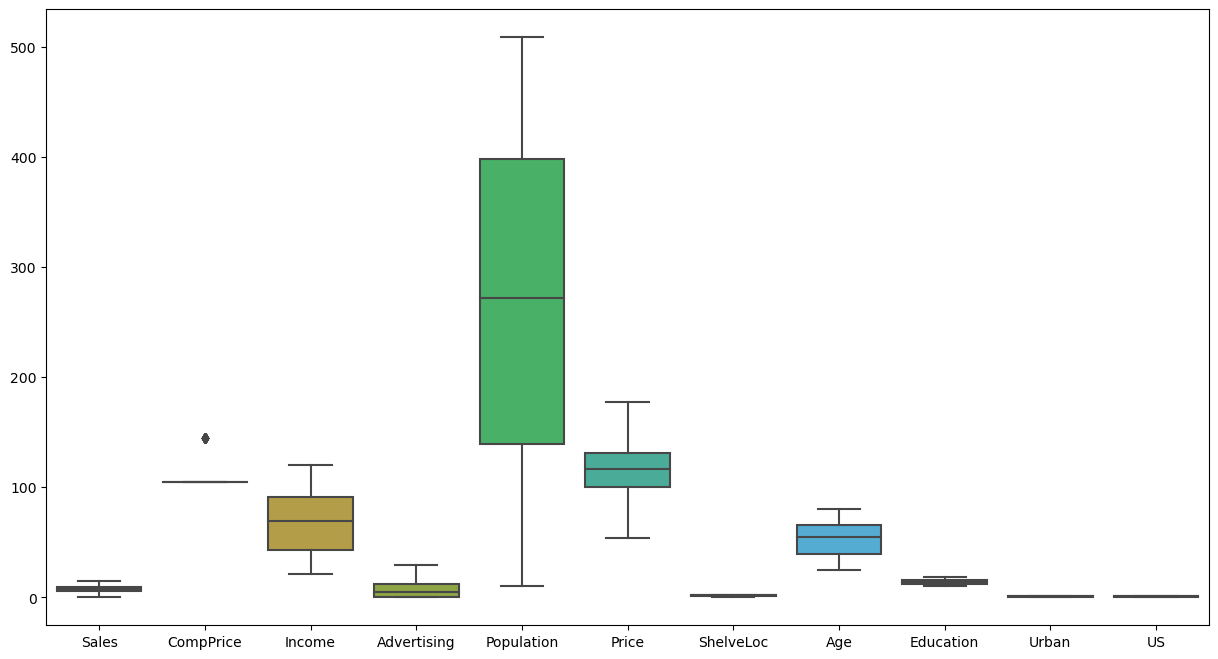

In [26]:
plt.figure(figsize=(15,8))
sns.boxplot(company)

## Checking skewness and kurtosis

In [27]:
num_columns = company.select_dtypes(exclude='object').columns.tolist()

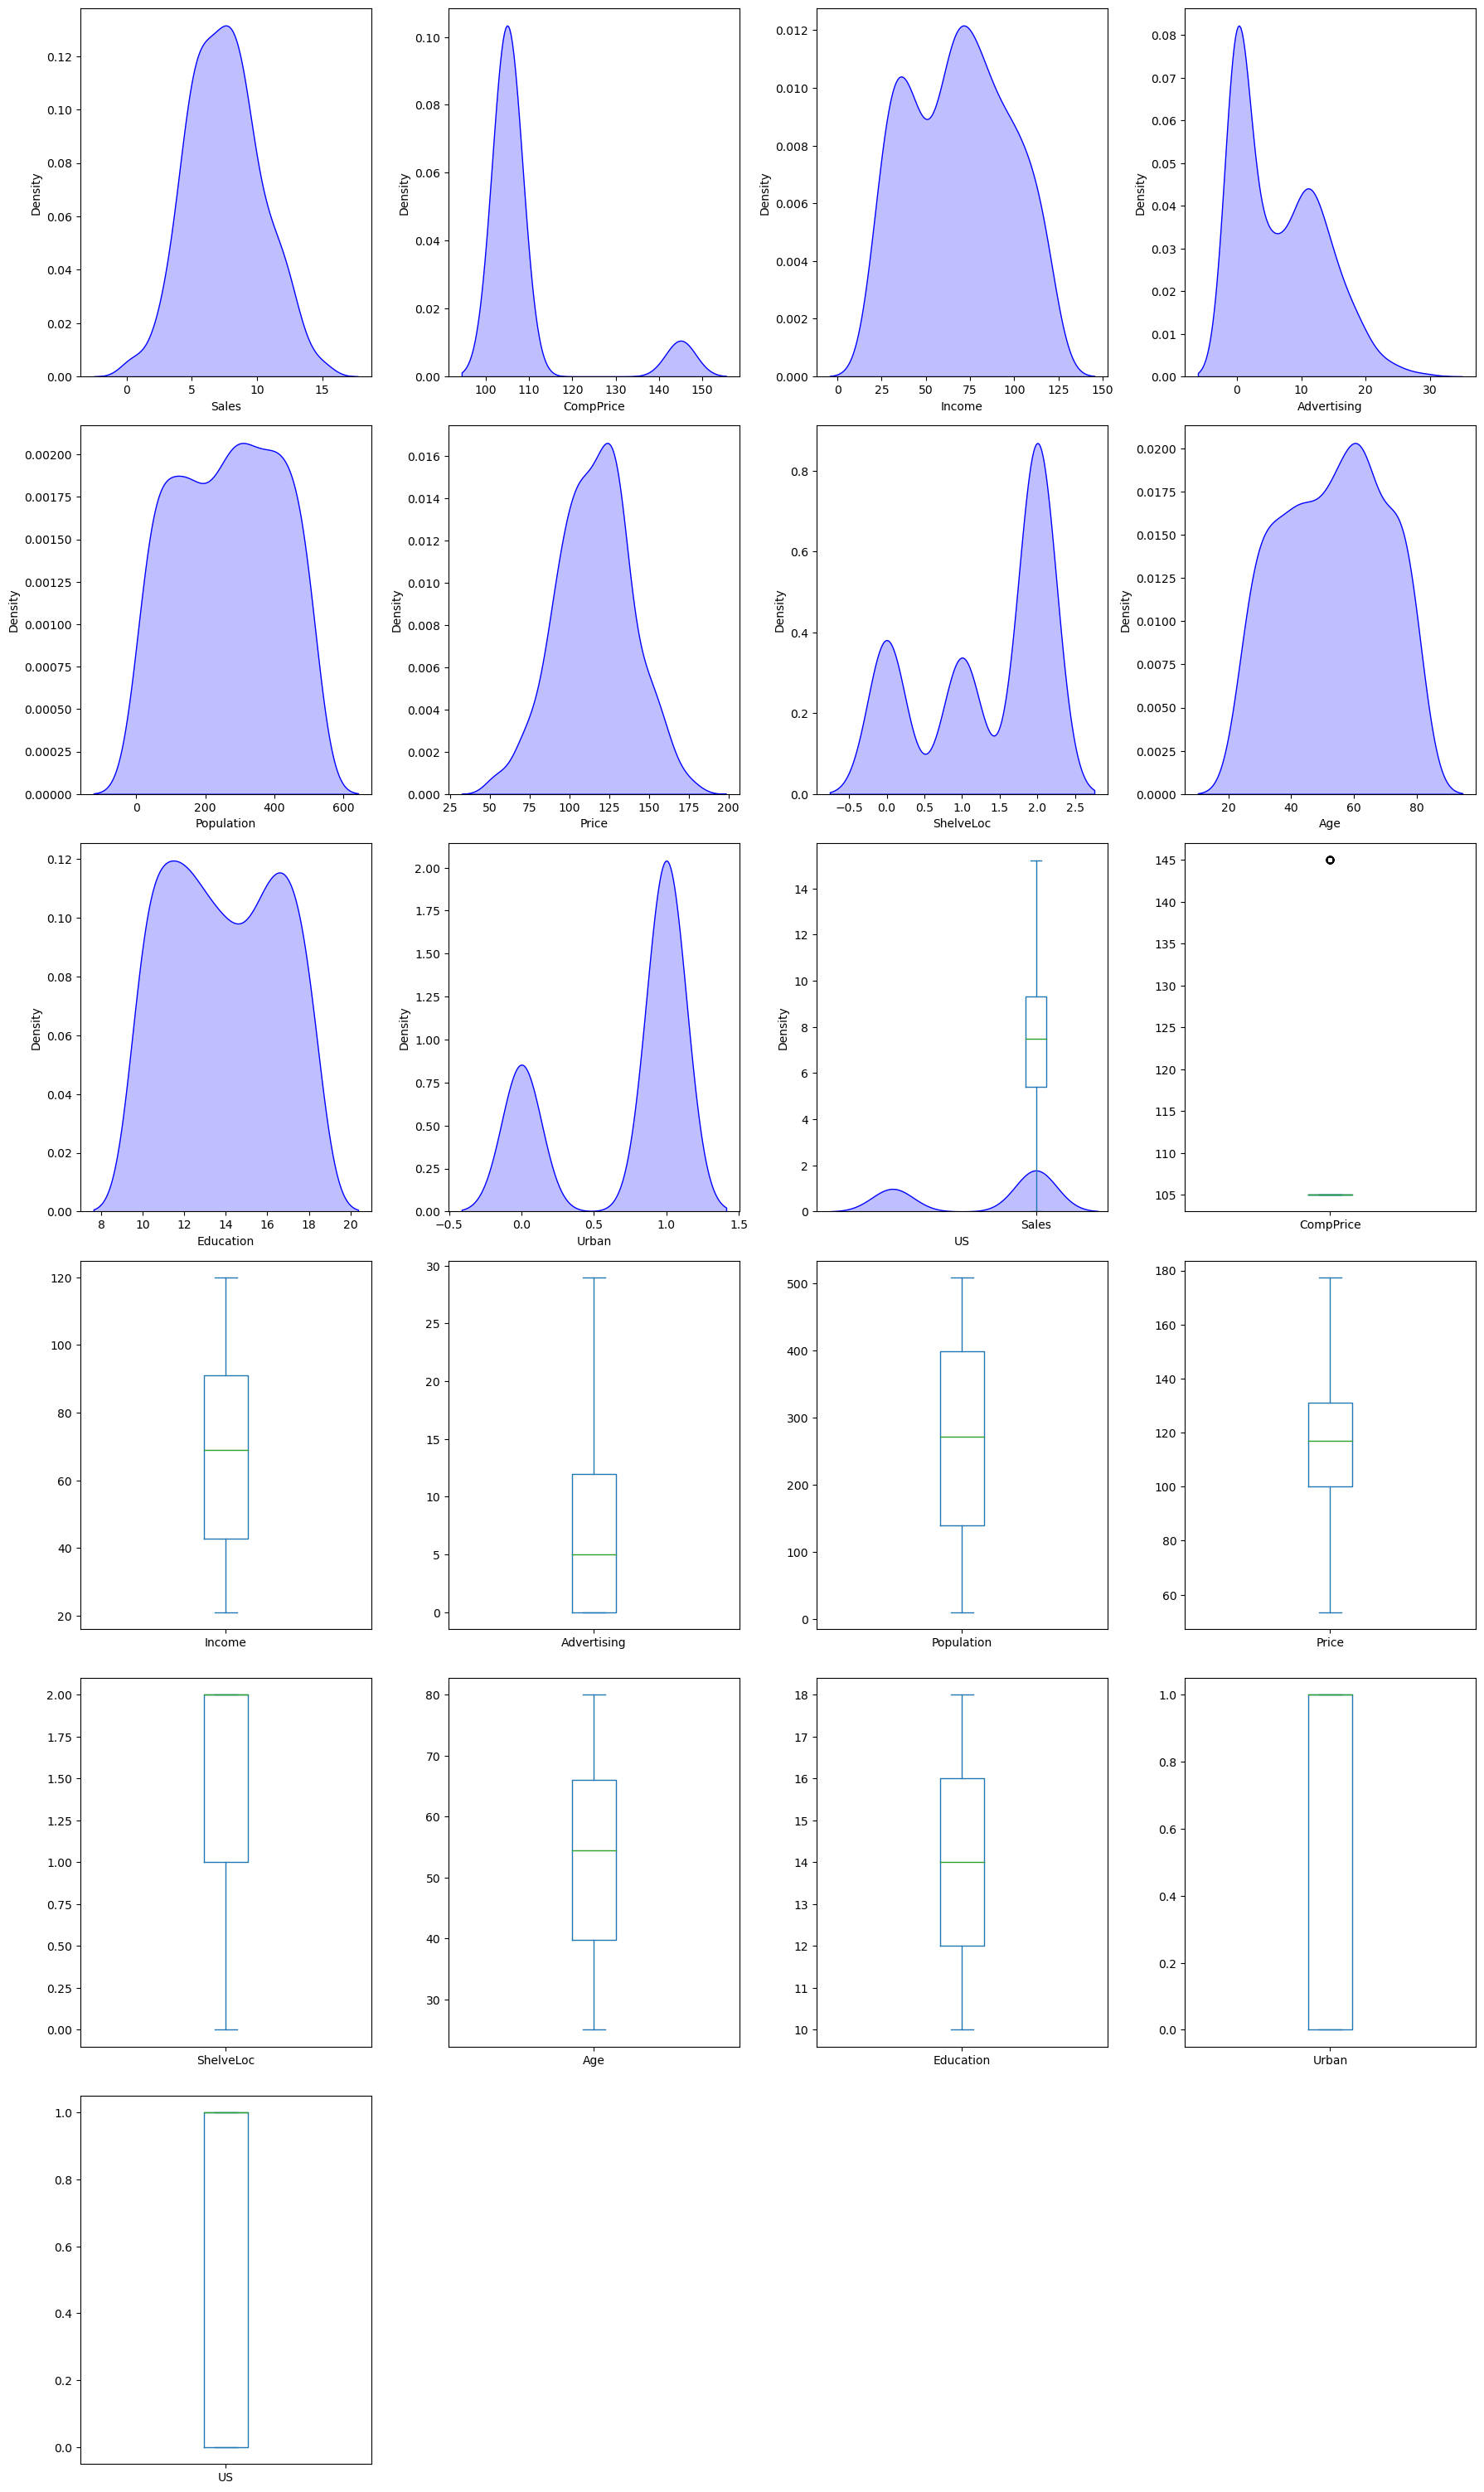

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
skewness,0.158392,2.823559,0.049444,0.639586,-0.051227,-0.075180,-0.627875,-0.077182,0.044007,-0.902426,-0.608327
kurtosis,-0.165273,6.002471,-1.085289,-0.545118,-1.202318,-0.044011,-1.273958,-1.134392,-1.298332,-1.191610,-1.638154


In [28]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(company[col],color='blue',shade=True)
    plt.subplot(8,4,i+10)
    company[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = company[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

## Checking Colinearity using pairplot

<Figure size 1800x4000 with 0 Axes>

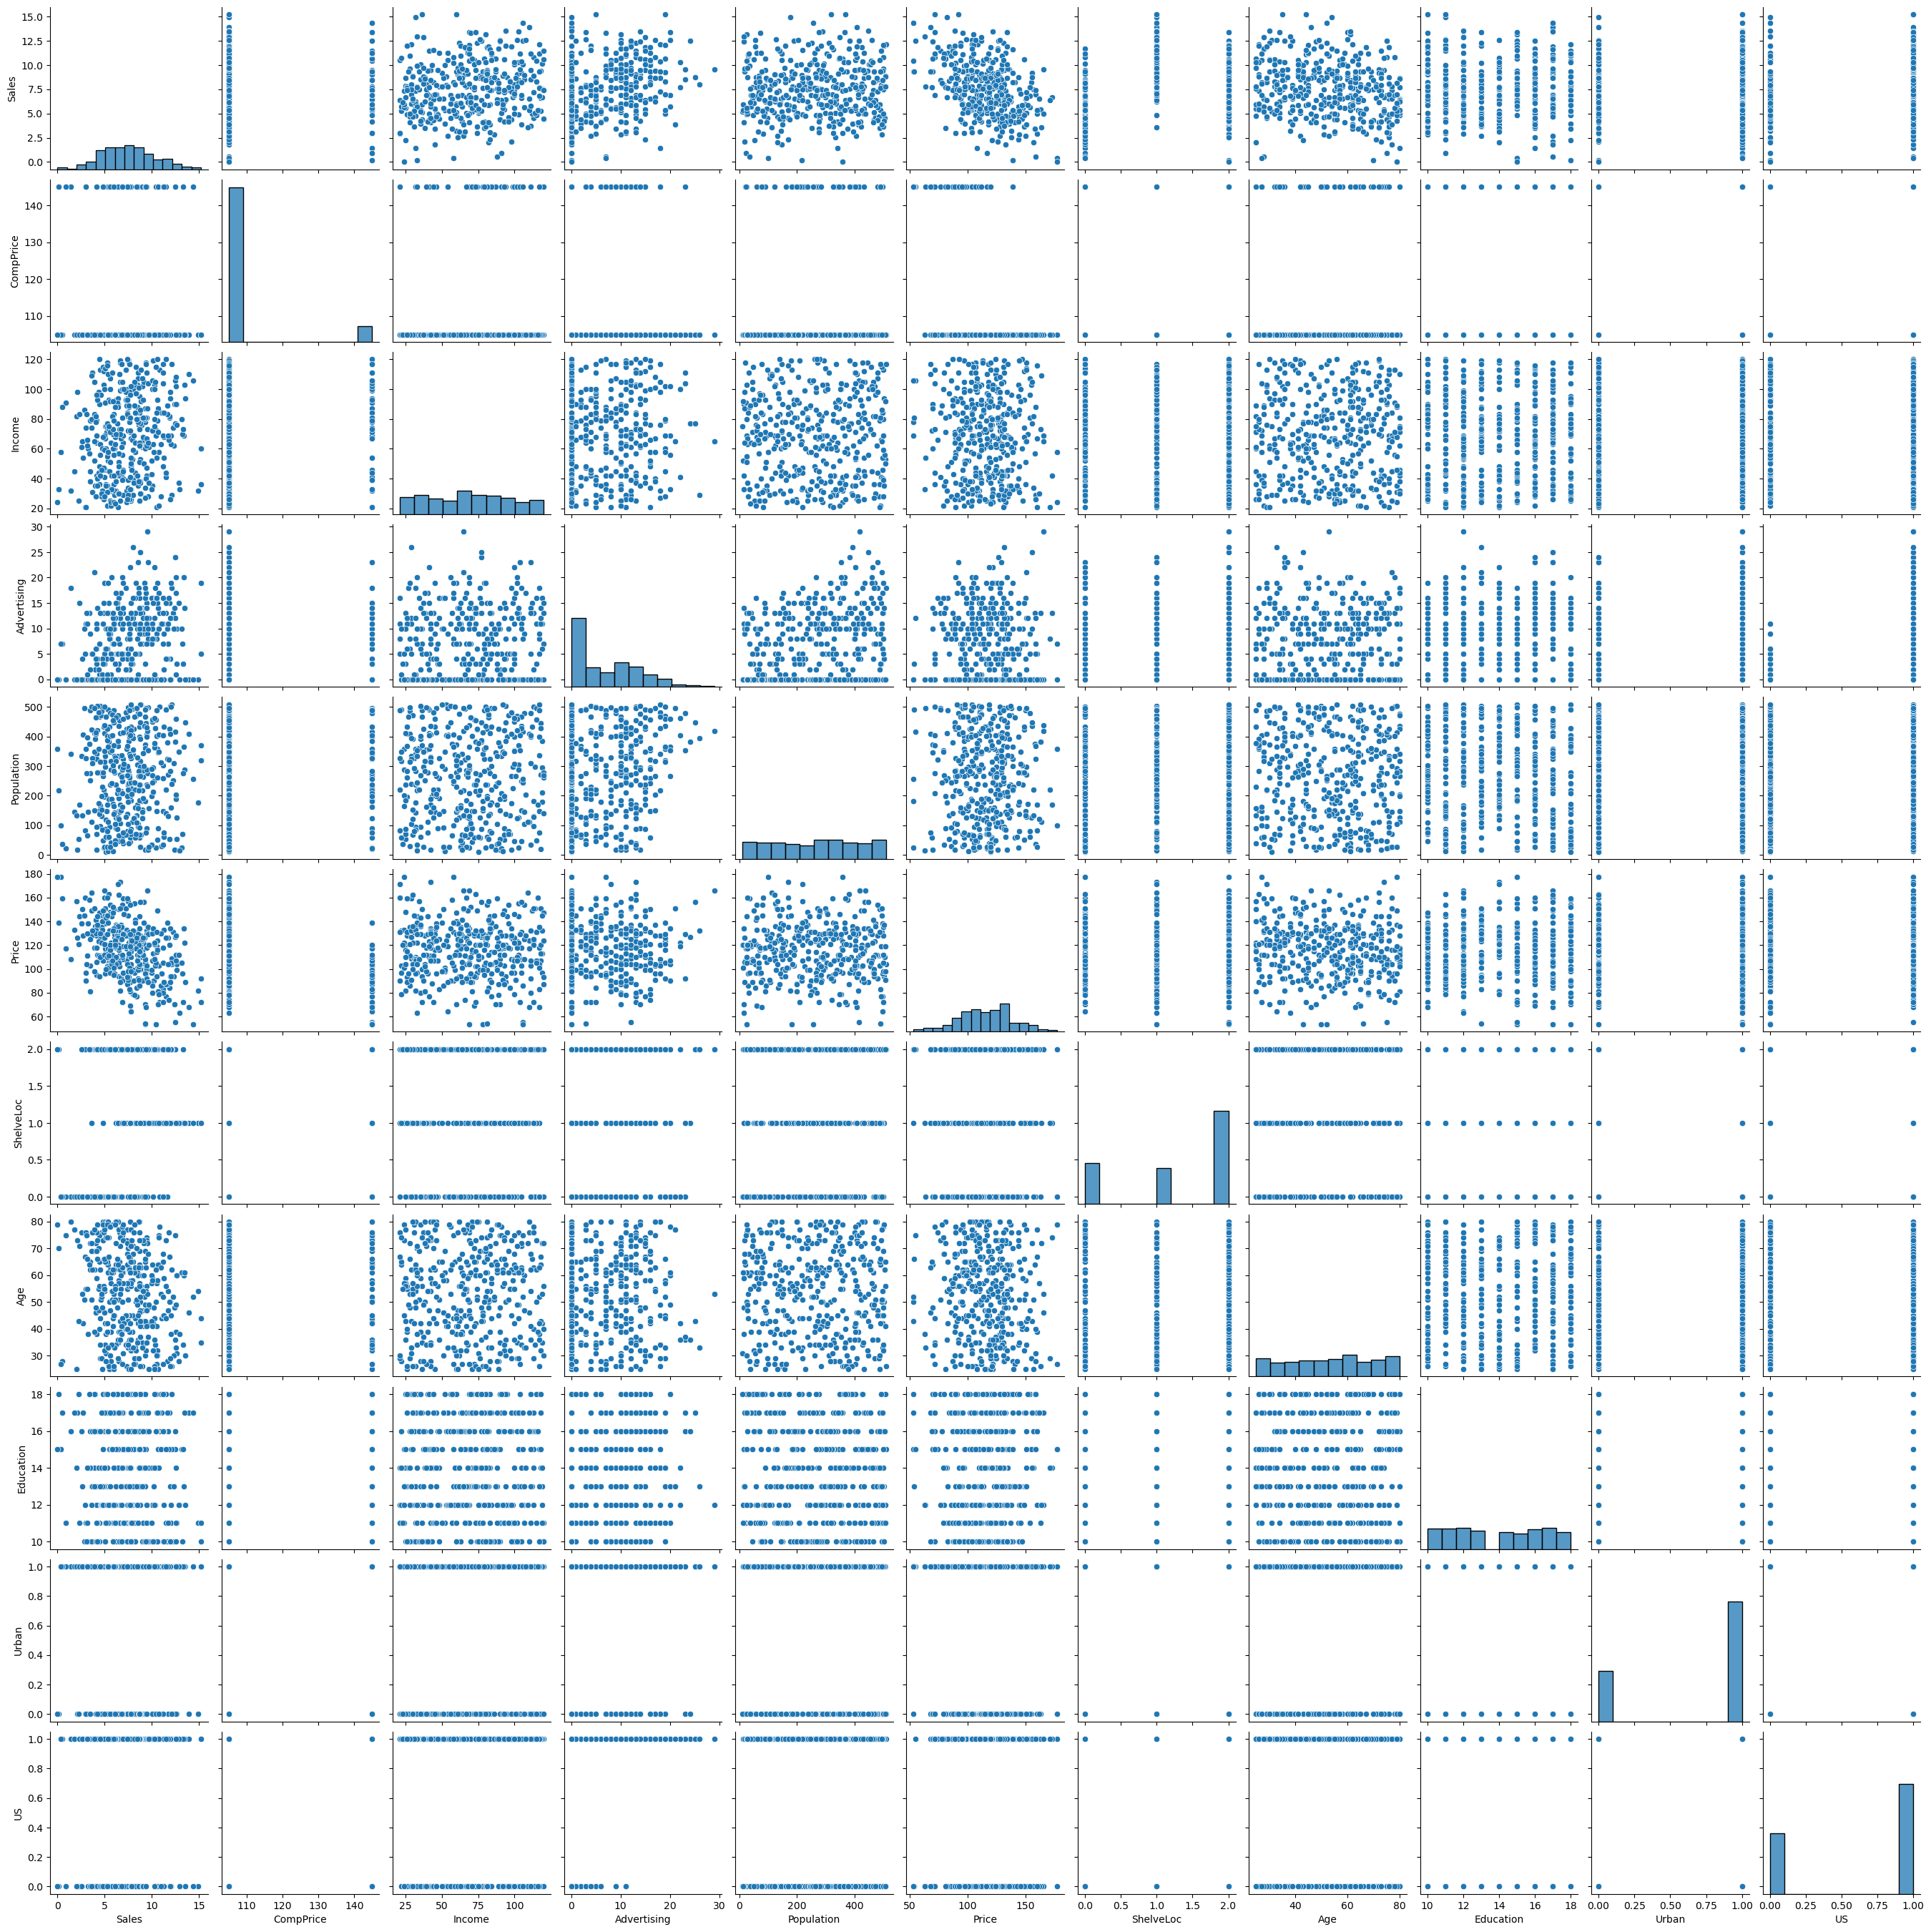

In [188]:
plt.figure(figsize=(18,40))
sns.pairplot(company)

## Correlation

In [29]:
company.corr().T

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,0.016895,0.153249,0.268872,0.050056,-0.443599,0.158550,-0.231735,-0.050562,-0.016324,0.176794
CompPrice,0.016895,1.000000,0.120295,0.018844,0.025965,-0.389517,-0.024644,0.032034,0.071542,0.017313,0.002434
Income,0.153249,0.120295,1.000000,0.058995,-0.007877,-0.055626,-0.067678,-0.004670,-0.056855,0.037967,0.089601
Advertising,0.268872,0.018844,0.058995,1.000000,0.265652,0.042374,0.008544,-0.004557,-0.033594,0.042035,0.684460
Population,0.050056,0.025965,-0.007877,0.265652,1.000000,-0.016705,-0.044772,-0.042663,-0.106378,-0.052025,0.060564
Price,-0.443599,-0.389517,-0.055626,0.042374,-0.016705,1.000000,0.019539,-0.103942,0.016256,0.049531,0.053930
ShelveLoc,0.158550,-0.024644,-0.067678,0.008544,-0.044772,0.019539,1.000000,0.056488,0.001492,-0.063978,-0.039760
Age,-0.231735,0.032034,-0.004670,-0.004557,-0.042663,-0.103942,0.056488,1.000000,0.006488,0.028479,0.008652
Education,-0.050562,0.071542,-0.056855,-0.033594,-0.106378,0.016256,0.001492,0.006488,1.000000,-0.033094,-0.078250
Urban,-0.016324,0.017313,0.037967,0.042035,-0.052025,0.049531,-0.063978,0.028479,-0.033094,1.000000,0.047085


## Visualisation of correlation

<Axes: >

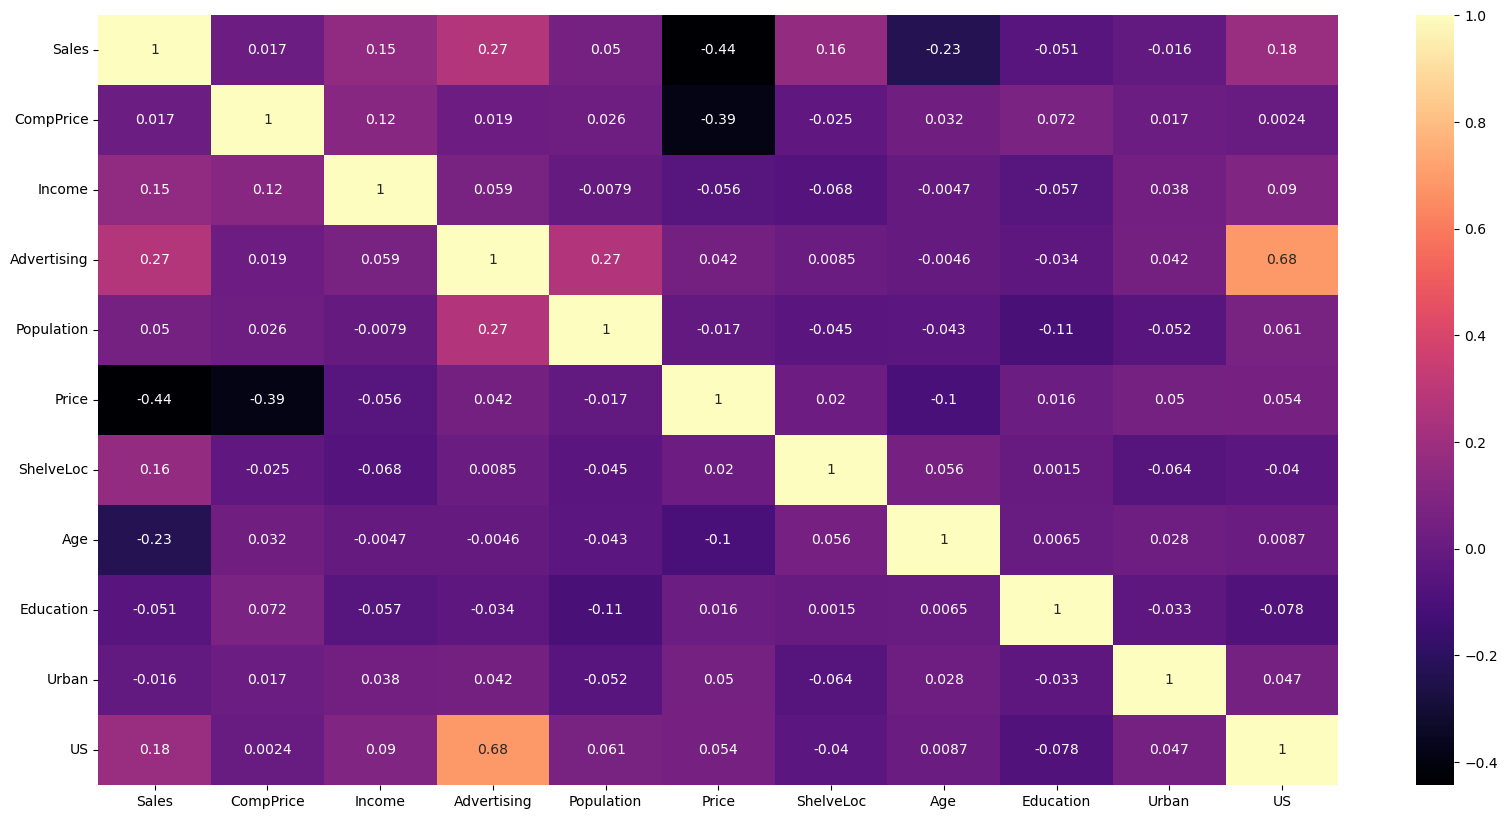

In [30]:
plt.figure(figsize=(20,10))
sns.heatmap(company.corr(),cmap='magma',annot=True)

In [31]:
X_columns=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban','US']

In [32]:
y1=np.empty(400, dtype=object)
i=0

for value in company['Sales'].astype(int):
    if value<=8:
        y1[i]='Risky'
    else:
        y1[i]='Good'
    i=i+1   

In [33]:
target=pd.DataFrame(y1,columns=['Target'])
target.value_counts()

Target
Risky     286
Good      114
dtype: int64

In [34]:
company[['Sales']].astype(int).value_counts()

Sales
6        54
5        53
7        52
8        50
4        41
9        35
10       30
11       22
3        19
12       16
2        10
13        7
0         5
1         2
14        2
15        2
dtype: int64

In [35]:
company =  pd.concat([company,target],axis=1)

In [36]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Target
0,9.50,105.0,73,11,276,120.0,0,42,17,1,1,Good
1,11.22,105.0,48,16,260,83.0,1,65,10,1,1,Good
2,10.06,105.0,35,10,269,80.0,2,59,12,1,1,Good
3,7.40,105.0,100,4,466,97.0,2,55,14,1,1,Risky
4,4.15,105.0,64,3,340,128.0,0,38,13,1,0,Risky


In [37]:
company1 = company.copy()

In [38]:
company1.drop('Sales',axis=1,inplace=True)

In [39]:
company1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Target
0,105.0,73,11,276,120.0,0,42,17,1,1,Good
1,105.0,48,16,260,83.0,1,65,10,1,1,Good
2,105.0,35,10,269,80.0,2,59,12,1,1,Good
3,105.0,100,4,466,97.0,2,55,14,1,1,Risky
4,105.0,64,3,340,128.0,0,38,13,1,0,Risky


In [40]:
company1.shape

(400, 11)

In [41]:
X =company1[X_columns]
X.shape

(400, 10)

In [42]:
y= company.Target
y.value_counts()

Risky    286
Good     114
Name: Target, dtype: int64

In [43]:
y.shape

(400,)

In [44]:
y.value_counts()

Risky    286
Good     114
Name: Target, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [46]:
X_train.shape

(320, 10)

In [47]:
X_test.shape

(80, 10)

In [48]:
y_train.shape

(320,)

In [49]:
y_test.shape

(80,)

## Decision Tree

In [50]:
clf1=DecisionTreeClassifier(criterion='gini') # by default critetion = gini

In [51]:
clf1.fit(X_train,y_train)

DecisionTreeClassifier()

In [52]:
y_pred1=clf1.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score
print("Accuracy", accuracy_score(y_pred1,y_test)*100)

Accuracy 73.75


##### Very less accuracy 

# Checking with Entropy

In [54]:
clf2=DecisionTreeClassifier(criterion='entropy')

In [55]:
clf2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [56]:
y_pred2=clf2.predict(X_test)

In [57]:
for name, score in zip(company1.columns, clf2.feature_importances_):
    print(name, score)

CompPrice 0.03483532036656476
Income 0.0960889969355278
Advertising 0.16229882966566084
Population 0.057245975872507626
Price 0.25295065970549935
ShelveLoc 0.15657090653335082
Age 0.16034524303916528
Education 0.0796640678817236
Urban 0.0
US 0.0


In [62]:
clf2.feature_importances_.shape

(10,)

<Axes: >

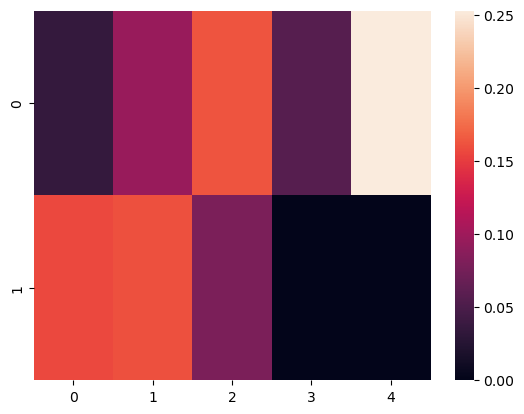

In [69]:
sns.heatmap(clf2.feature_importances_.reshape(-5,5))

In [279]:
from sklearn.metrics import accuracy_score
print("Accuracy", accuracy_score(y_pred2,y_test)*100)

Accuracy 75.0


# Classification Report

In [280]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

        Good       0.68      0.48      0.57        27
       Risky       0.77      0.89      0.82        53

    accuracy                           0.75        80
   macro avg       0.73      0.68      0.69        80
weighted avg       0.74      0.75      0.74        80



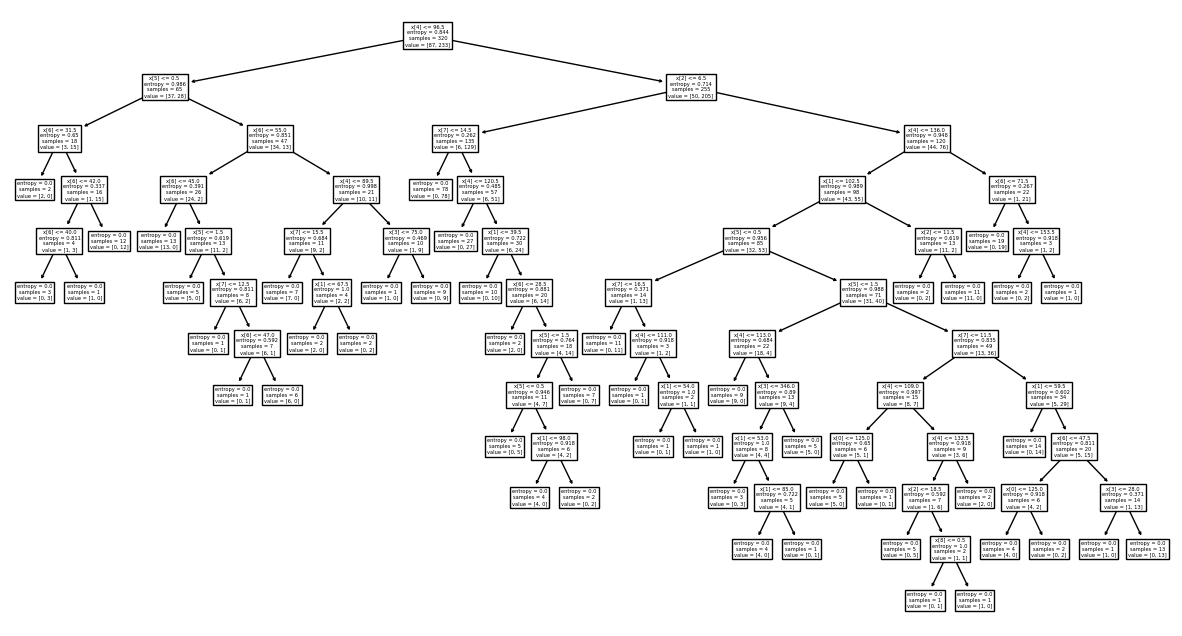

In [281]:
plt.figure(figsize=(15,8))
from sklearn.tree import plot_tree
plot_tree(clf2);

## Random forest

In [282]:
clf3=RandomForestClassifier()
clf3.fit(X_train,y_train)

RandomForestClassifier()

In [283]:
y_pred3 = clf3.predict(X_test)

In [284]:
print(accuracy_score(y_test,y_pred3)*100)

73.75


In [324]:
for name, score in zip(company1.columns, clf3.feature_importances_):
    print(name, score)

CompPrice 0.019813372588910597
Income 0.12094007529198977
Advertising 0.12736131482232918
Population 0.10091445667304869
Price 0.24485994439020972
ShelveLoc 0.13051043166666268
Age 0.13221224624664987
Education 0.07461148614425958
Urban 0.01574173393619164
US 0.03303493823974836


In [286]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

## Bagging

In [287]:
bag_clf = BaggingClassifier(
 DecisionTreeClassifier(), n_estimators=500,
 max_samples=100, bootstrap=True, n_jobs=-1
 )


In [288]:
bag_clf.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [289]:
y_pred=bag_clf.predict(X_test)

In [290]:
print(accuracy_score(y_test,y_pred)*100)

73.75


In [291]:
bag_clf = BaggingClassifier(
DecisionTreeClassifier(), n_estimators=500,
bootstrap=True, n_jobs=-1, oob_score=True)

In [292]:
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_


0.81875

In [320]:
y_pred7 = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred7)


0.3375

In [294]:
bag_clf.oob_decision_function_

array([[0.31111111, 0.68888889],
       [0.72316384, 0.27683616],
       [0.29255319, 0.70744681],
       [0.01970443, 0.98029557],
       [0.11309524, 0.88690476],
       [0.90419162, 0.09580838],
       [0.14285714, 0.85714286],
       [0.00526316, 0.99473684],
       [0.68205128, 0.31794872],
       [0.62765957, 0.37234043],
       [0.41242938, 0.58757062],
       [0.02197802, 0.97802198],
       [0.54450262, 0.45549738],
       [0.00518135, 0.99481865],
       [0.58100559, 0.41899441],
       [0.12716763, 0.87283237],
       [0.56424581, 0.43575419],
       [0.25      , 0.75      ],
       [0.16580311, 0.83419689],
       [0.32446809, 0.67553191],
       [0.24022346, 0.75977654],
       [0.49162011, 0.50837989],
       [0.04347826, 0.95652174],
       [0.31638418, 0.68361582],
       [0.01111111, 0.98888889],
       [0.34554974, 0.65445026],
       [0.0625    , 0.9375    ],
       [0.67058824, 0.32941176],
       [0.3597561 , 0.6402439 ],
       [0.51111111, 0.48888889],
       [0.

In [295]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)

In [296]:
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [297]:
for name, score in zip(company.columns, rnd_clf.feature_importances_):
    print(name, score)

Sales 0.016613812451442226
CompPrice 0.10012085429089249
Income 0.15316138761671563
Advertising 0.0759820176688013
Population 0.28247470810350184
Price 0.14583486384309907
ShelveLoc 0.1205823690741567
Age 0.053431819221777636
Education 0.010209350421661505
Urban 0.041588817307951775


In [298]:
print(accuracy_score(y_test,y_pred_rf)*100)

72.5


In [299]:
bag_clf1 = BaggingClassifier(
 DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
 n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1
 )

In [300]:
bag_clf1.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_leaf_nodes=16,
                                                   splitter='random'),
                  n_estimators=500, n_jobs=-1)

In [301]:
y_pr_bag = bag_clf1.predict(X_test)

In [302]:
print(accuracy_score(y_pr_bag,y_test)*100)

82.5


## Scaling Data

In [303]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)                              

In [304]:
bag_clf1 = BaggingClassifier(
 DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
 n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1
 )

In [305]:
bag_clf1.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_leaf_nodes=16,
                                                   splitter='random'),
                  n_estimators=500, n_jobs=-1)

In [306]:
Y_pred=bag_clf1.predict(X_test)

In [307]:
print(accuracy_score(y_test,Y_pred)*100)

81.25


## Checking for Overfitting and Overfitting

In [308]:
print('Training Score:{:.4f}'.format(bag_clf1.score(X_train,y_train)))
print('Test Score:{:.4f}'.format(bag_clf1.score(X_test,y_test)))

Training Score:0.9219
Test Score:0.8125


## HyperParameter Tuning`

In [321]:
from sklearn.model_selection import GridSearchCV
param_grid={ 
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

reg = GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid,cv=10)
reg.fit(X_train,y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [322]:
best_params = reg.best_params_
print("Best hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(X_train, y_train)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10}


DecisionTreeClassifier(max_depth=10, max_features='log2', min_samples_leaf=2,
                       min_samples_split=10)

In [311]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

In [312]:
 from scipy.stats import uniform

In [313]:
distributions = dict(C=uniform(loc=0, scale=4),
                     penalty=['l2', 'l1'])

In [314]:
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,
                              random_state=0)

In [315]:
Rsv = RandomizedSearchCV(logistic, distributions, random_state=0)
search = Rsv.fit(X_train,y_train)
best_params = search.best_params_
print("Best hyperparameters:", best_params)
 

Best hyperparameters: {'C': 1.75034884505077, 'penalty': 'l2'}


## CrossValidation Using Kfold

In [316]:
from sklearn.model_selection import KFold
num_trees = 25
max_features = 7
kfold = KFold(n_splits=7, random_state=14, shuffle=True)

In [317]:
from sklearn.model_selection import cross_val_score
model3 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model3, X, y, cv=kfold)


In [318]:
print(results.mean())

0.8323394693630627


## prediction for Bagging Classifier

In [354]:
company.sample(1)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Target
357,13.36,103,73,3,276,72,Medium,34,15,Yes,Yes,Good


In [355]:
company.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'Target'],
      dtype='object')

In [357]:
prediction = pd.DataFrame({'CompPrice':120, 'Income':60, 'Advertising':7, 'Population':305, 'Price':150,
       'ShelveLoc':2, 'Age':41, 'Education':10, 'Urban':1, 'US':1},index=[1]) 
rnd_clf.predict(prediction)
print("The profit will be:",rnd_clf.predict(prediction)) 

The profit will be: ['Risky']


# ! Thank You